# How to play on a piano 
> A guide on piano sound simulation using python.
> Based on exercise 10 from chapter 15 in [Aurélien Géron's machine learning book](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646). 
> The Bach choral is also from there 

In [2]:
from IPython.display import Audio
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## Some theory to begin with  
each note on a piano plays a frequency. As a reference, the leftmost note  

Lets start from generating some sound 
The next cell will play 2 notes (one with frequency 220Hz and one with frequency 240Hz) for one second. 

In [3]:
framerate = 44100 # in Hz -> how many time in a second to change the voltage on the speaker 
seconds_to_play = 1 # in seconds -> how long we are going to play the note 
time = np.linspace(0,seconds_to_play,seconds_to_play*framerate)
volume = 0.1 # thats the aplitude of the wave. defines how strongly we oscilate the drums 

wave220 = np.sin(2 * np.pi * 220 * time)
wave240 = np.sin(2 * np.pi * 240 * time)
wave = wave220 + wave240

Audio(data=volume*wave,rate=framerate);

Just to make the picture a little more clear, the only thing happend in the above cell is: 
 - we created some sinus signal 
 - we sent the singal to the speaker using the "Audio" method.

Thats it! It thats simple!
The frame rate is the granularity of the signal by time (how many points in a second are describing the signal we have). 
For historical reason it is 44100Hz. 
The volume/amplitude of the signal controls the how strong the generated sound would be. Think of it as the amount of voltage the speaker sees. 

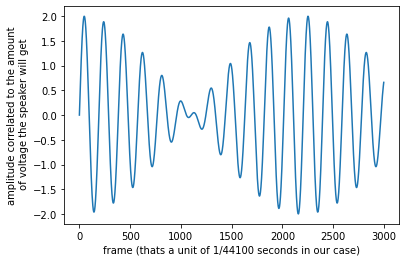

In [4]:
plt.plot(wave[:3000]) # small part of the wave we played
plt.xlabel("frame (thats a unit of 1/44100 seconds in our case)")
plt.ylabel("amplitude correlated to the amount\n of voltage the speaker will get");

Next lets play play with the above code and try modifying it a bit 

In [4]:
wave = np.r_[wave220, wave240] # <---- the only difference in the code is in this line

Audio(data=volume*wave,rate=framerate);

Instead of creating a combined sinus wave that lasts 44100 frames (or 1 seconds in case of our framerate), 
we concatenated the sinus waves with "np.r_" and got a signal twice as long with a 220Hz frequency in the first 44100 samples 
and 240Hz frequency in the last 44100 samples 

Lets zoom on the middle

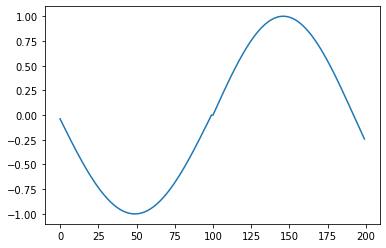

In [5]:
plt.plot(wave[framerate-100:framerate+100])

You can see that the wave is passing smoothly from one to another. When it is not the case we get a the speaker to click. Check out the next example 

In [6]:
wave = np.r_[wave220 + np.pi, wave240] # <---- the first part of the wave was shifted by pi 

Audio(data=volume*wave,rate=framerate);

You can hear a "click" at time 0 and at 1 second. first one is because the seaker goes from 0 voltage to 1 (no transition), 
second one is because we have a sharp peak in the signal. Thats something to take into account when you are working on the wave function. 
If you hear a lot of those "clicks" you can try make the wave smoother for them to disappear. 

So the way a piano works, each note beats on a string which in turn oscilates (same as the drum inside the speaker). 
left note beats on the shortest string that oscilates at the lowest frequency. 
The righter the note the higher the frequency. 
Each 12 notes the frequency doubles (an octave).
Lets try playing two notes on a piano: 

In [8]:
def note_position_to_frquency(note_pos):  # works for multiple notes (as you can tap multiple notes simultaneously) 
    """
    note=1 is the leftmost note in the piano which have a frequency ~65Hz
    note=0 would mean that no note was played. So for these notes I will return a frequency 0 which would have a wave=0 because sin(0)=0
    """
    lowest_frequency = 65
    frequencies = lowest_frequency * 2 ** ((np.array(note_pos) -1) / 12)
    frequencies[frequencies<lowest_frequency] = 0
    return frequencies
    
assert (note_position_to_frquency([1,13]) == np.array([65,130])).all(), "making sure the frequencies make sense"

def notes_to_sin_wave(note_pos ,note_length=1): # works for multiple notes/frquencies as well (combines them using wave1+wave2) 
    freq = note_position_to_frquency(note_pos)
    freq = np.round(note_length * freq) / note_length
    time = np.linspace(0,note_length, note_length * framerate)
    frequencies = np.sin(2*np.pi* np.array(freq).reshape(-1,1) * time).sum(axis=0)
    return frequencies

assert len(notes_to_sin_wave([0,12])) == framerate, "making sure the length makes sense" 

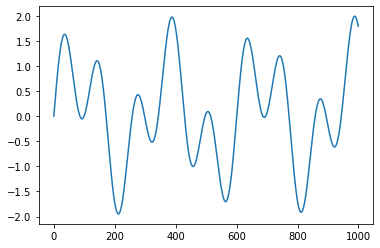

In [9]:
wave = notes_to_sin_wave([15,31]) 
plt.plot(wave[:1000])
Audio(data=volume*wave,rate=framerate);

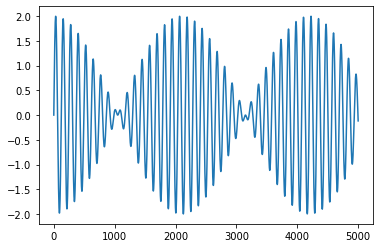

In [11]:
wave = notes_to_sin_wave([30,31]) 
plt.plot(wave[:5000])
Audio(data=volume*wave,rate=framerate);

In [12]:
melody = [
    [30,32,35],
    [20,25,30],
    [30,32,35],
]
wave = np.array([notes_to_sin_wave(notes) for notes in melody]).flatten()
Audio(data=volume*wave,rate=framerate);

Ok.. lets face it. I sound horrible. Maybe playing the piano is just not my thing. And I am not a compositor just yet so lets import some working melody:  

In [15]:
melody = [ # thats a Bach chorale. 
    [74, 70, 65, 58],
    [74, 70, 65, 58],
    [74, 70, 65, 58],
    [74, 70, 65, 58],
    [75, 70, 58, 55],
    [75, 70, 58, 55],
    [75, 70, 60, 55],
    [75, 70, 60, 55],
    [77, 69, 62, 50],
    [77, 69, 62, 50],
    [77, 69, 62, 50],
    [77, 69, 62, 50],
    [77, 70, 62, 55],
    [77, 70, 62, 55],
    [77, 69, 62, 55],
    [77, 69, 62, 55],
    [75, 67, 63, 48],
    [75, 67, 63, 48],
    [75, 69, 63, 48],
    [75, 69, 63, 48],
    [74, 70, 65, 46],
    [74, 70, 65, 46],
    [74, 70, 65, 46],
    [74, 70, 65, 46],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [74, 70, 65, 46],
    [74, 70, 65, 46],
    [74, 70, 65, 46],
    [74, 70, 65, 46],
    [75, 69, 63, 48],
    [75, 69, 63, 48],
    [75, 67, 63, 48],
    [75, 67, 63, 48],
    [77, 65, 62, 50],
    [77, 65, 62, 50],
    [77, 65, 60, 50],
    [77, 65, 60, 50],
    [74, 67, 58, 55],
    [74, 67, 58, 55],
    [74, 67, 58, 53],
    [74, 67, 58, 53],
    [72, 67, 58, 51],
    [72, 67, 58, 51],
    [72, 67, 58, 51],
    [72, 67, 58, 51],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [72, 69, 65, 53],
    [74, 71, 53, 50],
    [74, 71, 53, 50],
    [74, 71, 53, 50],
    [74, 71, 53, 50],
    [75, 72, 55, 48],
    [75, 72, 55, 48],
    [75, 72, 55, 50],
    [75, 72, 55, 50],
    [75, 67, 60, 51],
    [75, 67, 60, 51],
    [75, 67, 60, 53],
    [75, 67, 60, 53],
    [74, 67, 60, 55],
    [74, 67, 60, 55],
    [74, 67, 57, 55],
    [74, 67, 57, 55],
    [74, 65, 59, 43],
    [74, 65, 59, 43],
    [72, 63, 59, 43],
    [72, 63, 59, 43],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [72, 63, 55, 48],
    [75, 67, 60, 60],
    [75, 67, 60, 60],
    [75, 67, 60, 60],
    [75, 67, 60, 60],
    [77, 70, 62, 58],
    [77, 70, 62, 58],
    [77, 70, 62, 56],
    [77, 70, 62, 56],
    [79, 70, 62, 55],
    [79, 70, 62, 55],
    [79, 70, 62, 53],
    [79, 70, 62, 53],
    [79, 70, 63, 51],
    [79, 70, 63, 51],
    [79, 70, 63, 51],
    [79, 70, 63, 51],
    [77, 70, 63, 58],
    [77, 70, 63, 58],
    [77, 70, 60, 58],
    [77, 70, 60, 58],
    [77, 70, 62, 46],
    [77, 70, 62, 46],
    [77, 68, 62, 46],
    [75, 68, 62, 46],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [74, 67, 58, 55],
    [74, 67, 58, 55],
    [74, 67, 58, 55],
    [74, 67, 58, 55],
    [75, 67, 58, 53],
    [75, 67, 58, 53],
    [75, 67, 58, 51],
    [75, 67, 58, 51],
    [77, 65, 58, 50],
    [77, 65, 58, 50],
    [77, 65, 56, 50],
    [77, 65, 56, 50],
    [70, 63, 55, 51],
    [70, 63, 55, 51],
    [70, 63, 55, 51],
    [70, 63, 55, 51],
    [75, 65, 60, 45],
    [75, 65, 60, 45],
    [75, 65, 60, 45],
    [75, 65, 60, 45],
    [74, 65, 58, 46],
    [74, 65, 58, 46],
    [74, 65, 58, 46],
    [74, 65, 58, 46],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [74, 65, 58, 58],
    [74, 65, 58, 58],
    [74, 65, 58, 58],
    [74, 65, 58, 58],
    [75, 67, 58, 57],
    [75, 67, 58, 57],
    [75, 67, 58, 55],
    [75, 67, 58, 55],
    [77, 65, 60, 57],
    [77, 65, 60, 57],
    [77, 65, 60, 53],
    [77, 65, 60, 53],
    [74, 65, 58, 58],
    [74, 65, 58, 58],
    [74, 65, 58, 58],
    [74, 65, 58, 58],
    [72, 67, 58, 51],
    [72, 67, 58, 51],
    [72, 67, 58, 51],
    [72, 67, 58, 51],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [72, 65, 57, 53],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
    [70, 65, 62, 46],
]

In [16]:
wave = np.array([notes_to_sin_wave(np.array(notes) - 35) for notes in melody]).flatten() # for some unknown reason all the notes are shifted by 35 from my convention
Audio(data=volume*wave,rate=framerate);

The main feeling here is that the tempo of the melody is really slow. we can make it faster, though. Lets just tell 'Audio' method that the sampling rate is 
actually much higher (the time difference between the samples is smaller) and get a faster playing melody 

In [17]:
fastforward_factor = 2
Audio(data=volume*wave,rate=framerate*fastforward_factor);

You can hear that we again have this "click" problem due to places where the signal jumps. 
Lets check it out

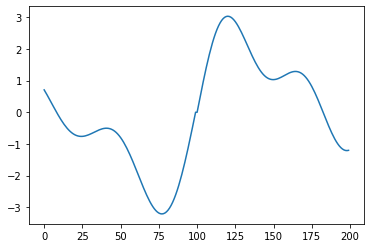

In [18]:
import pandas as pd
jump = pd.Series((wave[1:] - wave[:-1])).idxmax() # find a location where the jump is significant
plt.plot(wave[jump-100:jump+100]);

To deal with this issue (make the jump between notes dissappear) we can round the frequency a bit so that all the sinuses will end with 0. 
Think about a case where you have a frequency 1.01Hz which means that after 1 second the wave will have a some phase above 0, so we round up 
the note to have a frequency 1Hz and after 1 second (the basic time we play a note) the sinus have a full number of cycles. 
So lets change the notes_to_sin_wave method accordingly: 

In [63]:
def notes_to_sin_wave(note_pos ,note_length=1): # works for multiple notes/frquencies as well (combines them using wave1+wave2) 
    freq = note_position_to_frquency(note_pos)
    freq = np.round(note_length * freq) / note_length # <-- this line is new. we round up all the frequencies so that at time=note_length all waves have 0 amplitude.  
    time = np.linspace(0,note_length, note_length * framerate)
    frequencies = np.sin(2*np.pi* np.array(freq).reshape(-1,1) * time).sum(axis=0)
    return frequencies

assert len(notes_to_sin_wave([0,12])) == framerate, "making sure the length makes sense" 

Final result of plating on a piano using python:  

In [19]:
fastforward_factor = 4
wave = np.array([notes_to_sin_wave(np.array(notes) - 35) for notes in melody]).flatten() # for some unknown reason all the notes are shifted by 35 from my convention
Audio(data=volume*wave,rate=framerate*fastforward_factor);

I think it is really cool you can basically take a list of numbers and convert them to a melody and vice versa. 
Its even more cool now that you get a feeling of how easy it is. 
Creating a list of notes that sounds good... thats something more complicated and is not a part of this notebook. 